In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
import numpy as np
import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator #image preprocessing

In [ ]:
#Defining the parameters for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Applying ImageDataGenerator on trainset and test set
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/forest fire/Dataset/train_set',target_size = (64,64), batch_size = 32, class_mode = 'categorical')

Found 445 images belonging to 2 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/forest fire/Dataset/test_set',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 121 images belonging to 2 classes.


In [ ]:
print(x_train.class_indices)#checking the number of classes

{'forest': 0, 'with fire': 1}


In [ ]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 281, 1: 164})

## Creating the model

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#initializing the model
model=Sequential()

In [ ]:
#adding convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
#adding maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#adding flatten layer
model.add(Flatten())

In [ ]:
#adding hidden layer
model.add(Dense(32))

In [ ]:
#adding output layer
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 985,058
Trainable params: 985,058
Non-trainable params: 0
__________________________________________________

## ** Compiling the model**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
len(x_train)

14

## **Fitting the model**

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
14/14 [==============================] - 105s 8s/step - loss: 1.7213 - accuracy: 0.6337 - val_loss: 0.8877 - val_accuracy: 0.8017
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.4457 - accuracy: 0.8562 - val_loss: 0.1241 - val_accuracy: 0.9587
Epoch 3/10
14/14 [==============================] - 21s 2s/step - loss: 0.2149 - accuracy: 0.9146 - val_loss: 0.1121 - val_accuracy: 0.9504
Epoch 4/10
14/14 [==============================] - 22s 2s/step - loss: 0.1960 - accuracy: 0.9169 - val_loss: 0.1181 - val_accuracy: 0.9421
Epoch 5/10
14/14 [==============================] - 21s 2s/step - loss: 0.1871 - accuracy: 0.9236 - val_loss: 0.0873 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 22s 2s/step - loss: 0.1618 - accuracy: 0.9393 - val_loss: 0.0770 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 22s 2s/step - loss: 0.1662 - accuracy: 0.9416 - val_loss: 0.0753 - val_accuracy: 0.9587
Epoch 8/10
14/14 [=

## **Saving our model**

In [ ]:
model.save('forest1 (2).h5')

## **Predicting our results**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("forest1 (2).h5")  

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/Dataset/train_set/with fire/with fire (14).jpg",target_size= (64,64))#loading of the image
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)#changing the shape
#pred = model.predict_classes(x)#predicting the classes
preds=model.predict(x)
preds=np.argmax(preds,axis=1)
preds

1/1 [==============================] - 0s 128ms/step


array([1])

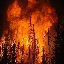

In [ ]:
img

In [ ]:
index=['Forest','With Fire']
result = str(index[preds[0]])
result

'With Fire'

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg",target_size= (64,64))#loading of the image
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds=model.predict(x)
preds=np.argmax(preds,axis=1)
preds

1/1 [==============================] - 0s 31ms/step


array([0])

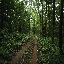

In [ ]:
img

In [ ]:
index=['Forest','With Fire']
result=str(index[preds[0]])
result

'Forest'

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/Dataset/test_set/with fire/Forest_Fire (4).jpg",target_size= (64,64))#loading of the image
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds=model.predict(x)
preds=np.argmax(preds,axis=1)
preds

1/1 [==============================] - 0s 26ms/step


array([1])

In [ ]:
index=['Forest','With Fire']
result=str(index[preds[0]])
result

'With Fire'

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/forest fire/Dataset/test_set/forest/1009821.jpg",target_size= (64,64))#loading of the image
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
preds=model.predict(x)
preds=np.argmax(preds,axis=1)
preds

1/1 [==============================] - 0s 28ms/step


array([0])

In [ ]:
index=['Forest','With Fire']
result=str(index[preds[0]])
result

'Forest'